# part one:


**Goodness-of-Fit Test for Binomial Distribution**

In order to test the hypothesis $H_0 $ that the random variables $ X_1, X_2, \ldots, X_{6115} $ are binomially distributed with parameters $n = 12 $ and $p = 0.5 $, we can use a goodness-of-fit test, such as the Chi-square test. Here's how you can approach this test:

1. **Expected Frequencies**: First, calculate the expected frequencies for each category (number of sons from 0 to 12) using the binomial distribution formula:

   $$
   \text{Expected frequency for } k \text{ sons} = \binom{12}{k} \cdot 0.5^k \cdot 0.5^{12-k} \cdot N
   $$

   where $\binom{12}{k}$ is the binomial coefficient, 0.5 is the assumed probability of having a son under the null hypothesis, $n$ is the number of trials (12 in this case), and $N$ is the total number of families (6115).

2. **Chi-square Statistic**: Next, calculate the chi-square statistic using the formula:

   $$
   \chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}
   $$

   where $O_i$ is the observed frequency and $E_i$ is the expected frequency for each category.

3. **Degrees of Freedom**: Determine the degrees of freedom for the test, which would be the number of categories minus 1 minus the number of parameters estimated from the data. Since we are estimating $p $, the degrees of freedom would be $ 12 - 1 - 1 = 10 $.

4. **P-value**: Compare the calculated chi-square statistic to the chi-square distribution with the appropriate degrees of freedom to obtain a p-value.

5. **Decision Rule**: If the p-value is less than the chosen significance level (usually 0.05), you would reject the null hypothesis, concluding that the data do not follow a binomial distribution with the given parameters. If the p-value is greater than the significance level, you would not reject the null hypothesis.

This test allows us to assess whether the observed distribution of sons in families is consistent with a binomial distribution with $ n = 12 $ and $p = 0.5$

In [2]:
from scipy.stats import binom, chi2
import numpy as np

# Given data
observed_frequencies = np.array([7, 45, 181, 478, 829, 1112, 1343, 1033, 670, 286, 104, 24, 3])
n = 12  # number of trials (number of children)
p = 0.5  # probability under the null hypothesis (probability of having a son)
N = 6115  # total number of families

# Calculate expected frequencies using the binomial distribution
expected_frequencies = np.array([binom.pmf(k, n, p) * N for k in range(n + 1)])

# Calculate chi-square statistic
chi_square_statistic = ((observed_frequencies - expected_frequencies) ** 2 / expected_frequencies).sum()
degrees_of_freedom = n - 1  # degrees of freedom (12 categories - 1 parameter estimated)

# Calculate the p-value from the chi-square statistic
p_value = chi2.sf(chi_square_statistic, degrees_of_freedom)

# Print the results
print(f"Expected frequencies: {expected_frequencies}")
print(f"Chi-square statistic: {chi_square_statistic}")
print(f"Degrees of freedom: {degrees_of_freedom}")
print(f"P-value: {p_value}")


Expected frequencies: [   1.49291992   17.91503906   98.53271484  328.44238281  738.99536133
 1182.39257813 1379.45800781 1182.39257813  738.99536133  328.44238281
   98.53271484   17.91503906    1.49291992]
Chi-square statistic: 249.19544266399544
Degrees of freedom: 11
P-value: 4.117920790991538e-47


# part two:

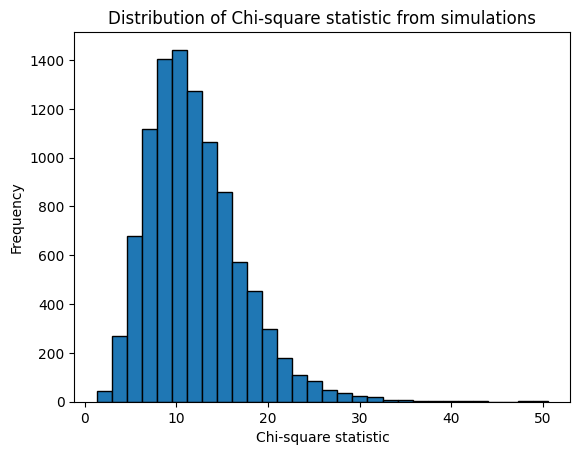

In [3]:
import matplotlib.pyplot as plt

# Number of simulations
num_simulations = 10000
simulated_chi_square_statistics = []

# Run the simulations
for _ in range(num_simulations):
    # Simulate the observed frequencies: simulate a family having 12 children 6115 times
    simulated_observed = np.random.binomial(n, p, N)
    # Calculate the frequency of each possible outcome (0 to 12 sons)
    simulated_frequencies = np.array([np.sum(simulated_observed == k) for k in range(n + 1)])
    # Calculate chi-square statistic for the simulation
    simulated_chi_square = ((simulated_frequencies - expected_frequencies) ** 2 / expected_frequencies).sum()
    # Store the statistic
    simulated_chi_square_statistics.append(simulated_chi_square)

# Plot the histogram of the simulated chi-square statistics
plt.hist(simulated_chi_square_statistics, bins=30, edgecolor='black')
plt.xlabel('Chi-square statistic')
plt.ylabel('Frequency')
plt.title('Distribution of Chi-square statistic from simulations')
plt.show()


the histogram showing the distribution of the Chi-square statistic from the simulations. Each simulation represents a hypothetical set of 6115 families with 12 children each, under the assumption that the number of sons in each family follows a binomial distribution with p=0.5.

# Part three:

In [4]:
# Calculate the p-value for the observed chi-square statistic from part a
# by comparing it to the distribution obtained from the simulation
observed_chi_square_statistic = 249.19544266399507  # from part a
simulated_chi_square_array = np.array(simulated_chi_square_statistics)

# The p-value is the proportion of simulated chi-square statistics
# that are greater than the observed chi-square statistic
simulated_p_value = np.mean(simulated_chi_square_array >= observed_chi_square_statistic)

# Check if we reject the null hypothesis with alpha = 0.05
alpha = 0.05
reject_h0 = simulated_p_value < alpha

simulated_p_value, reject_h0


(0.0, True)

Based on the distribution obtained from the simulation, the p-value for the observed Chi-square statistic from part a is 0.0, which implies that none of the simulations produced a Chi-square value as extreme as the observed statistic.

With $ \alpha = 0.05 $, the null hypothesis $H_0 $ is rejected because the simulated p-value is less than $ \alpha $. This result is consistent with the earlier p-value calculation using the theoretical Chi-square distribution, confirming that the observed data significantly deviate from what would be expected under a binomial distribution with $ p = 0.5 $ and $ n = 12 $.